#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

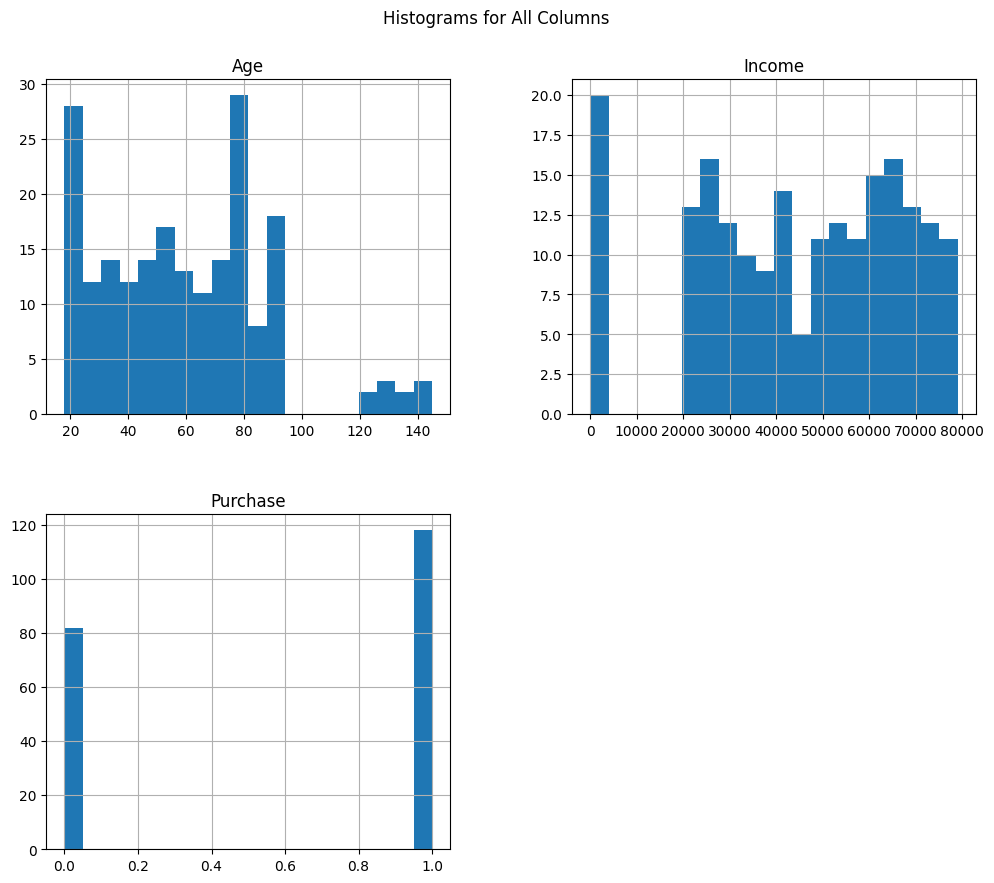

<Figure size 640x480 with 0 Axes>

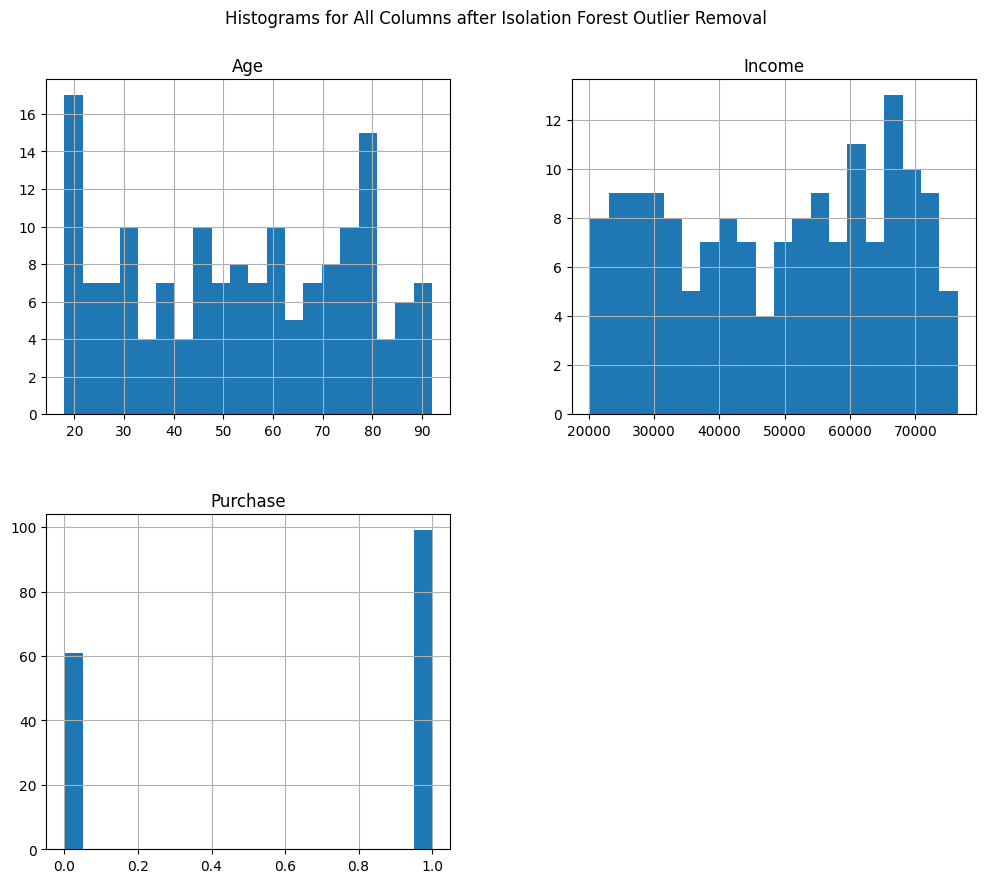

In [25]:
import pandas as pd
df = pd.read_csv('data/sample_data_with_outliers.csv')
df.head()

# Plot histograms for all columns
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for All Columns', y=0.95)
plt.show()
 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


# Specify the features you want to analyze
features_of_interest = ['Age', 'Income']

# Isolation Forest for outlier removal
clf = IsolationForest(contamination=0.2, random_state=42)  # Adjust contamination based on your data
outlier_predictions = clf.fit_predict(df[features_of_interest])
df_no_outliers_iso = df[outlier_predictions == 1]

# Display the plots
plt.tight_layout()
plt.show()

# Plot histograms for all columns after outlier removal
df_no_outliers_iso.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms for All Columns after Isolation Forest Outlier Removal', y=0.95)
plt.show()


#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


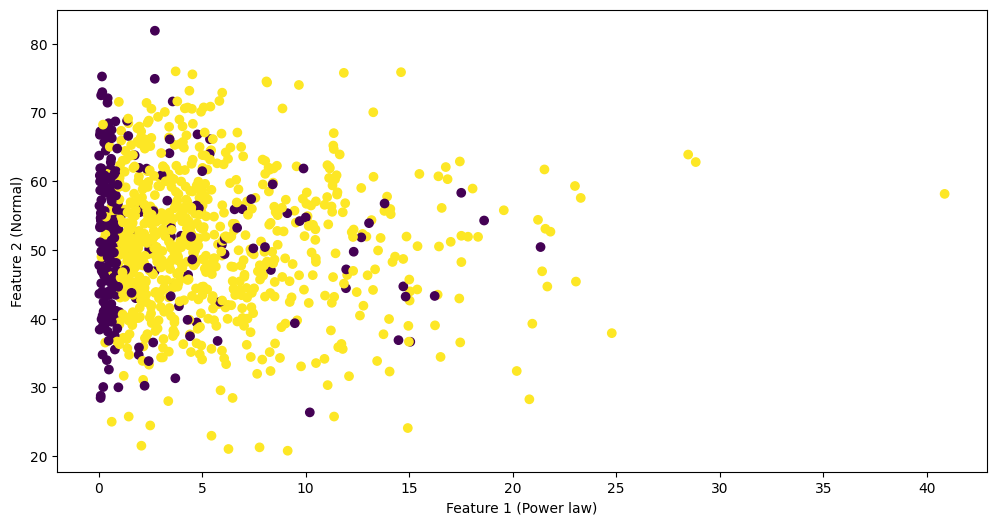

In [26]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [27]:
titanic_df = pd.read_csv('../2-week2/data/titanic.csv')
titanic_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [28]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# Select columns for modeling
selected_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch']

# Create feature matrix X and target variable y
X = titanic_df[selected_columns]
y = titanic_df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['age', 'sibsp', 'parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # You can change the imputation strategy here
    ('scaler', StandardScaler())
])

categorical_features = ['pclass', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # You can change the imputation strategy here
    ('onehot', OneHotEncoder())
])

# Combine numerical and categorical transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', LogisticRegression())])  # You can change the classifier here

# Fit the model and make predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.77


#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [29]:
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

# Your code here
sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})

# One-hot encode the 'color' and 'target' columns
sample_encoded = pd.get_dummies(sample, columns=['color', 'target'])

print(sample_encoded)

   yumminess  color_blue  color_green  color_red  target_apple  target_grass  \
0         10       False        False       True          True         False   
1          2        True        False      False         False         False   
2          3       False         True      False         False          True   
3          1       False        False       True         False         False   
4          6        True        False      False         False         False   
5          9       False         True      False          True         False   

   target_moon  target_sky  
0        False       False  
1        False        True  
2        False       False  
3        False        True  
4         True       False  
5        False       False  


#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the data
data_path = 'data/synthetic_patient_data.csv'
df = pd.read_csv(data_path)

# Separate features and target variable
X = df.drop('has_disease', axis=1)
y = df['has_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['age', 'bmi', 'systolic_bp', 'diastolic_bp', 'cholesterol_level']
categorical_features = ['gender', 'exercise_frequency', 'smoker', 'family_history', 'diet_quality', 'us_state']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])

# Evaluate the model without re-balancing classes using cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy without re-balancing: {cv_scores.mean():.2f}')

# Evaluate the model with re-balancing classes using cross-validation
pipeline_balanced = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))])

cv_scores_balanced = cross_val_score(pipeline_balanced, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy with re-balancing: {cv_scores_balanced.mean():.2f}')

# Fit the model on the entire training set without re-balancing
pipeline.fit(X_train, y_train)

# Predictions on the test set without re-balancing
y_pred = pipeline.predict(X_test)

# Evaluate performance without re-balancing
print("\nPerformance without re-balancing:")
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Fit the model on the entire training set with re-balancing
pipeline_balanced.fit(X_train, y_train)

# Predictions on the test set with re-balancing
y_pred_balanced = pipeline_balanced.predict(X_test)

# Evaluate performance with re-balancing
print("\nPerformance with re-balancing:")
print(f'Precision: {precision_score(y_test, y_pred_balanced):.2f}')
print(f'Recall: {recall_score(y_test, y_pred_balanced):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred_balanced):.2f}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_balanced):.2f}')

Cross-Validation Accuracy without re-balancing: 0.85
Cross-Validation Accuracy with re-balancing: 0.86

Performance without re-balancing:
Precision: 0.89
Recall: 0.83
F1 Score: 0.86
Accuracy: 0.86

Performance with re-balancing:
Precision: 0.89
Recall: 0.83
F1 Score: 0.86
Accuracy: 0.86
